In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
#Data Manipulation and Cleaning
#Remove duplicates rows
df = pd.DataFrame({'A':[1,1,2],'B':[3,3,4]})
df_no_dup = df.drop_duplicates()
df_no_dup

,A,B
0,1,3
2,2,4


In [3]:
#Handle Missing values
df = pd.DataFrame({'A':[1,None,3],'B':[4,5,None]})
print(df)
print(df.dropna())
print(df.fillna(0))
print(df.interpolate())

     A    B
0  1.0  4.0
1  NaN  5.0
2  3.0  NaN
     A    B
0  1.0  4.0
     A    B
0  1.0  4.0
1  0.0  5.0
2  3.0  0.0
     A    B
0  1.0  4.0
1  2.0  5.0
2  3.0  5.0


In [4]:
#Rename columns
df = pd.DataFrame({'a':[1,2],'b':[3,4]})
df = df.rename(columns={'a':'A','b':'B'})
print(df)

   A  B
0  1  3
1  2  4


In [5]:
#Groups & Summary stats
product = np.random.choice(['A','B','C'],size=10)
category = np.random.choice(['Good','Bad','Best'],size=10)
sales = np.random.randint(20,100,size=10)
df = pd.DataFrame({
    'Product':product,
    'Category':category,
    'Sales':sales
})
print(df)

result = df.groupby('Category')['Sales'].sum()
print(result)                 
print(result)

  Product Category  Sales
0       A     Best     87
1       C     Good     21
2       B     Good     76
3       C      Bad     79
4       C     Good     27
5       C     Best     76
6       B     Good     98
7       C      Bad     50
8       A     Best     26
9       C      Bad     92
Category
Bad     221
Best    189
Good    222
Name: Sales, dtype: int32
Category
Bad     221
Best    189
Good    222
Name: Sales, dtype: int32


In [7]:
#Filter rows by condition
df = pd.DataFrame({'Category':['X','X','Y'],
                   'Value':[10,20,30]})
print(df.groupby('Category')['Value'].agg(['mean','sum']))

          mean  sum
Category           
X         15.0   30
Y         30.0   30


In [8]:
#Filter rows by condition
print(df[df['Value']>15])

  Category  Value
1        X     20
2        Y     30


In [10]:
#Data Aggregation & Transformation
df1 = pd.DataFrame({'ID':[1,2], 'Score':[50,60]})
df2 = pd.DataFrame({'ID':[1,2],'Grade':['B','A']})
print(pd.merge(df1,df2,on='ID',how='inner'))

   ID  Score Grade
0   1     50     B
1   2     60     A


In [11]:
print(pd.merge(df1,df2,on='ID',how='outer'))

   ID  Score Grade
0   1     50     B
1   2     60     A


In [13]:
#Pivot with aggregation
sales = pd.DataFrame({
    'Year':[2023,2023,2024],
    'Quarter':['Q1','Q2','Q3'],
    'Revenue':[100,150,200]
})
print(sales)
print(pd.pivot_table(sales,
                     index='Year',
                     columns='Quarter',
                     values='Revenue',
                     aggfunc='sum'
                     ))

   Year Quarter  Revenue
0  2023      Q1      100
1  2023      Q2      150
2  2024      Q3      200
Quarter     Q1     Q2     Q3
Year                        
2023     100.0  150.0    NaN
2024       NaN    NaN  200.0


In [14]:
#Add a calculated column
df = pd.DataFrame({
    'Price':[5,10],
    'Qty':[2,3]
})
df['Total'] = df['Price'] * df['Qty']
df

,Price,Qty,Total
0,5,2,10
1,10,3,30


In [15]:
#Apply with lambda
df['DoubleQty'] = df['Qty'].apply(lambda x:x*2)
print(df)

   Price  Qty  Total  DoubleQty
0      5    2     10          4
1     10    3     30          6


In [16]:
#Data Analysis and Exploration
#Summary statistics
nums  = pd.Series([1,2,3,4,5])
print(nums.mean(),nums.median(),nums.mode()[0])

3.0 3.0 1


In [17]:
#Correlation matrix
df = pd.DataFrame({
    'A':[1,2,3],
    'B':[2,4,6]
})
corr = df.corr()
corr

,A,B
A,1.0,1.0
B,1.0,1.0


In [18]:
#Rolling Average
ts = pd.Series([1,2,3,4,5,6])
print(ts.rolling(window=3).mean())

0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64


In [21]:
#top-N frequent values
cats = pd.Series(['a','b','c','a','b'])
print(cats.value_counts())
print(cats.value_counts().head(2))

a    2
b    2
c    1
Name: count, dtype: int64
a    2
b    2
Name: count, dtype: int64


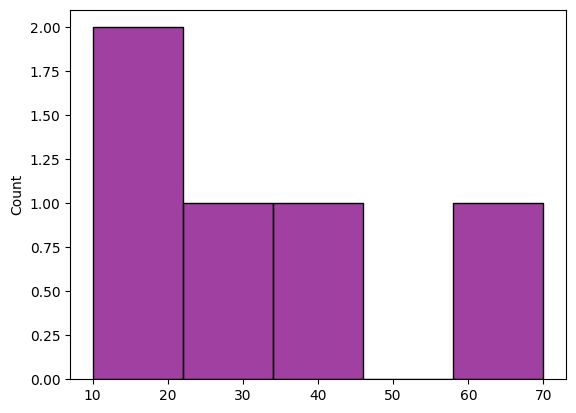

In [23]:
#Data Visualization
#Histogram and bar plot
nums = [30,20,10,40,70]
sns.histplot(nums, bins=5,color='purple')
plt.show()

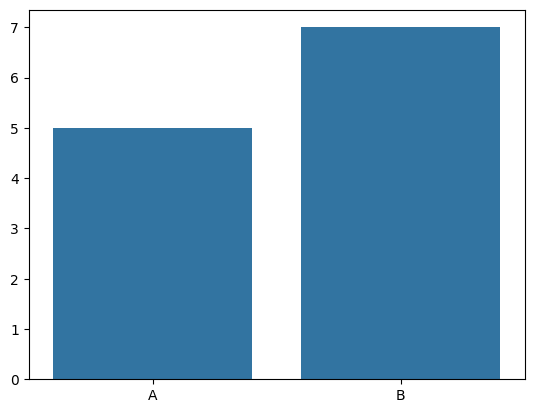

In [24]:
sns.barplot(x=['A','B'],y=[5,7])
plt.show()

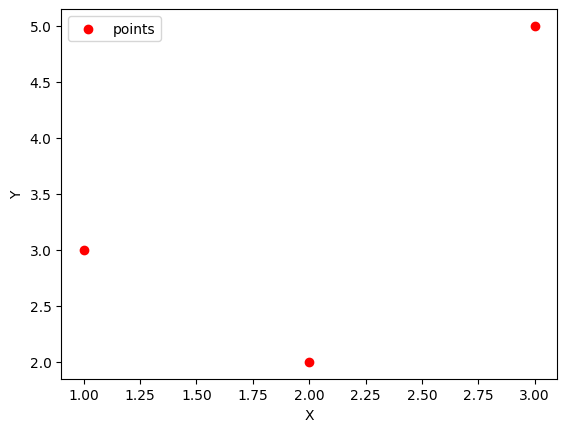

In [25]:
#Scatter Plot
plt.scatter([1,2,3],[3,2,5], c='red',label='points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

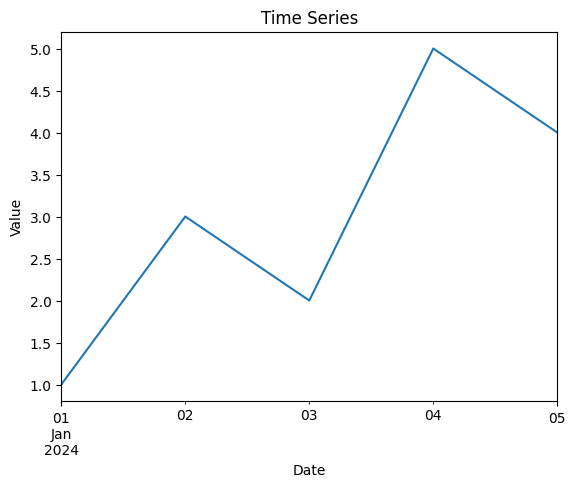

In [26]:
#plot a time series
dates = pd.date_range('2024-01-01',periods=5)
values = pd.Series([1,3,2,5,4],index=dates)
values.plot(title="Time Series")
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [27]:
#Basic python and logic
from collections import Counter
print(Counter[1,2,2,3,1])

collections.Counter[1, 2, 2, 3, 1]


In [28]:
#sort list of dicts by key
data = [{'name':'Bob','age':25},{'name':'Ann','age':30}]
print(sorted(data, key=lambda x:x['age']))

[{'name': 'Bob', 'age': 25}, {'name': 'Ann', 'age': 30}]


In [29]:
#Check palindrome
def ispalindrome(s):
    s = s.lower().replace(' ','')
    return s == s[::-1]
print(ispalindrome("Race car"))

True


In [30]:
#Find unique pairs summing to target
def find_pairs(nums,target):
    seen, pairs = set(),set()
    for n in nums:
        if target-n in seen:
            pairs.add(tuple(sorted((n,target-n))))
        seen.add(n)
    return pairs

print(find_pairs([1,2,3,4,5],6))

{(2, 4), (1, 5)}


In [31]:
#Working with json & apis
import json
data = '{"name":"Alice","age":25}'
df = pd.json_normalize(json.loads(data))
df

,name,age
0,Alice,25


In [32]:
#Numpy array Manipulation
import numpy as np
arr = np.array([1,2,3,4,5])
print(arr.mean(),np.median(arr),arr.std())
print(arr.max(),arr.min())
print(arr.reshape(1,-1))

3.0 3.0 1.4142135623730951
5 1
[[1 2 3 4 5]]


In [34]:
#Converting string to datetime
df = pd.DataFrame({
    'Date':['2024-01-01','2024-02-01']
})
df['Date'] = pd.to_datetime(df['Date'])
df
df.dtypes

Date    datetime64[ns]
dtype: object

In [35]:
#Monthly rolling average
ts = pd.Series(range(90), index=pd.date_range('2024-01-01',periods=90))
print(ts.rolling('30D').mean().head())

2024-01-01    0.0
2024-01-02    0.5
2024-01-03    1.0
2024-01-04    1.5
2024-01-05    2.0
Freq: D, dtype: float64


In [36]:
print(ts.resample('M').mean())


2024-01-31    15.0
2024-02-29    45.0
2024-03-31    74.5
Freq: ME, dtype: float64


C:\Users\rajat\AppData\Local\Temp\ipykernel_18652\2606586456.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  print(ts.resample('M').mean())
